In [15]:
import os
import json
from dataclasses import asdict
from dotenv import load_dotenv
from openai import OpenAI
from IPython.display import Image
from protocol import Env,Message
from agents import Group
from agent import Agent

 
[2024-12-10 18:26:13][INFO]: All agents are fully connected


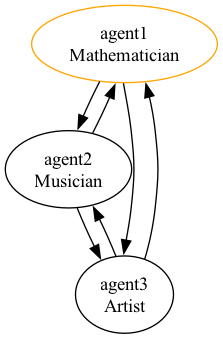

In [38]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Agent(name="agent1", role="Mathematician", description="Transfer to me if you need help with math.", dify_access_token=os.environ.get("AGENT1_ACCESS_TOKEN")),
        Agent(name="agent2", role="Musician", description="Transfer to me if you need help with music.", dify_access_token=os.environ.get("AGENT2_ACCESS_TOKEN")),
        Agent(name="agent3", role="Artist", description="Transfer to me if you need help with art.", model_client=model_client)
    ]
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True)

Image(g.draw_relations())

In [39]:
g.update_group_messages(Message(sender="user", action="talk", result="Can anyone help me with math? 2+2=?"))
g.update_group_messages(Message(sender="agent1", action="solve", result="2+2=4"))
g.update_group_messages(Message(sender="user", action="talk", result="Can anyone help me with music?"))

In [40]:
g.group_messages.context
# g.current_agent

[Message(sender='user', action='talk', result='Can anyone help me with math? 2+2=?'),
 Message(sender='agent1', action='solve', result='2+2=4'),
 Message(sender='user', action='talk', result='Can anyone help me with music?')]

In [41]:
# Do handoff
# After handoff the current agent will be updated to the one who will speak next
next_agent = g.handoff(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini")

# Print the group message protocol instance
print('-'*50)
print("Below Is The Group Message Protocol Instance")
print('-'*50)
print(json.dumps(asdict(g.group_messages), indent=4))
# print('-'*50)
# print("Below Message Send To `{}` who is {}".format(g.current_agent,g.members_map[g.current_agent].role))
# print('-'*50)
# print(g._build_send_message(g.group_messages,cut_off=3,send_to=g.current_agent))

 
[2024-12-10 18:26:17][INFO]: handoff from agent1 to agent2 by using auto2 mode
--------------------------------------------------
Below Is The Group Message Protocol Instance
--------------------------------------------------
{
    "group_id": "b9eafcc8-08f4-48f6-a0ae-f266ebe86523",
    "env": {
        "description": "This is a test environment",
        "members": [
            {
                "name": "agent1",
                "role": "Mathematician",
                "description": "Transfer to me if you need help with math."
            },
            {
                "name": "agent2",
                "role": "Musician",
                "description": "Transfer to me if you need help with music."
            },
            {
                "name": "agent3",
                "role": "Artist",
                "description": "Transfer to me if you need help with art."
            }
        ],
        "relationships": {
            "agent1": [
                "agent2",
            

In [42]:
g.update_group_messages(Message(sender="user", action="talk", result="How about music for reading?"))
_ = g.call_agent(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini")

 
[2024-12-10 18:26:18][INFO]: no handoff needed, stay with agent2 judge by auto2 mode
 
[2024-12-10 18:26:22][INFO]: Call agent agent2
 
[2024-12-10 18:26:22][INFO]: Agent agent2 response: 


In [28]:
g.update_group_messages(Message(sender="user", action="talk", result="Let's discuss what is beauty."))
_ = g.call_agent(next_speaker_select_mode="auto2",include_current=False,model="gpt-4o-mini")

 
[2024-12-10 18:21:12][INFO]: handoff from agent2 to agent3 by using auto2 mode
 
[2024-12-10 18:21:15][INFO]: Call agent agent3
 
[2024-12-10 18:21:15][INFO]: Agent agent3 response: Beauty is a multifaceted concept that can evoke deep emotional responses and inspire creativity across various forms of art, including painting, music, and literature. It often transcends cultural and temporal boundaries, prompting reflection on what it means to find beauty in our surroundings and in ourselves.

In visual arts, beauty can be explored through elements like color, form, and composition. A harmonious balance can create pleasing aesthetics that resonate with viewers. For example, the use of contrasting colors can evoke different emotions, while symmetry is often associated with beauty in nature and design.

In music, beauty might manifest as melody, harmony, and rhythm. Certain chords and progressions can create a sense of longing or joy, illustrating how sound can powerfully communicate feel

In [29]:
_ = g.call_agent(next_speaker_select_mode="auto2",include_current=False,model="gpt-4o-mini")

 
[2024-12-10 18:21:22][INFO]: handoff from agent3 to agent2 by using auto2 mode
 
[2024-12-10 18:21:30][INFO]: Call agent agent2
 
[2024-12-10 18:21:30][INFO]: Agent agent2 response: Beauty is indeed a profound and complex topic, and I find it fascinating how it permeates every facet of our existence, from the natural world to the realms of art and music. 

In music, beauty can arise in many forms. It may be found in the intricate melodies of a Bach fugue, where counterpoint creates a rich tapestry of sound, or in the minimalist repetitions of Philip Glass, which invite listeners into a meditative state. The emotional depth of a symphony, the haunting resonance of a solo instrument, or the layered harmonies of choral works all embody beauty in their unique ways.

Furthermore, beauty in music is not just about technical skill; it also encompasses the emotional connection it fosters. A simple folk tune can be just as beautiful as an elaborate orchestral piece if it resonates with the li

In [30]:
_ = g.call_agent(next_speaker_select_mode="auto2",include_current=False,model="gpt-4o-mini")

 
[2024-12-10 18:21:34][INFO]: handoff from agent2 to agent3 by using auto2 mode
 
[2024-12-10 18:21:38][INFO]: Call agent agent3
 
[2024-12-10 18:21:38][INFO]: Agent agent3 response: Beauty indeed serves as a catalyst for creativity and expression in art, and I resonate with your thoughts on its emotional connection. In my own work, beauty influences not only the aesthetic choices I make but also the themes I explore. I find that beauty can act as a bridge to deeper narratives and conversations, allowing art to transcend mere visuals and touch upon universal human experiences.

In painting, for instance, beauty might emerge through the juxtaposition of colors—a vibrant sunset, for example, can evoke a feeling of nostalgia or peace. The intricate details of a flower, captured through brush strokes, remind viewers of growth and transience. I often strive to depict beauty not just as perfection but as a reflection of life’s complexities, showcasing the beauty in vulnerability and imperfe

In [31]:
_ = g.call_agent(agent="agent1",model="gpt-4o-mini")

 
[2024-12-10 18:21:41][INFO]: manually set the current agent to agent1
 
[2024-12-10 18:21:46][INFO]: Call agent agent1
 
[2024-12-10 18:21:46][INFO]: Agent agent1 response: Beauty is indeed a powerful and multifaceted concept that resonates across different disciplines, including mathematics. While it may not seem as overtly emotional as art or music, beauty in mathematics often manifests through elegance and simplicity in proofs, equations, and theorems.

In mathematics, beauty can be found in the harmony of a well-constructed equation, the symmetry of geometric figures, or the elegance of a proof that succinctly uncovers deep truths with minimal complexity. For instance, Euler's identity, \( e^{i\pi} + 1 = 0 \), is often celebrated for its beauty because it links five fundamental mathematical constants in a surprisingly simple and profound way.

Moreover, the aesthetic quality of mathematical work can serve as a source of inspiration, much like how visual artists and musicians draw

## Add and Delete Member Dynamicly 

Like people come and go in some place or some group

 
[2024-12-10 18:22:06][INFO]: Self-defined relationships


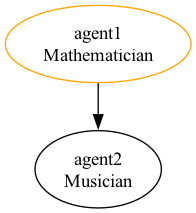

In [32]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Agent(name="agent1", role="Mathematician", description="Transfer to me if you need help with math.", dify_access_token=os.environ.get("AGENT1_ACCESS_TOKEN")),
        Agent(name="agent2", role="Musician", description="Transfer to me if you need help with music.", dify_access_token=os.environ.get("AGENT2_ACCESS_TOKEN"))
    ],
    relationships={"agent1": ["agent2"]}
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True)

Image(g.draw_relations())

 
[2024-12-10 18:22:50][INFO]: Self-defined relationships
 
[2024-12-10 18:22:50][INFO]: Succesfully add member agent3
 
[2024-12-10 18:22:50][INFO]: Self-defined relationships
 
[2024-12-10 18:22:50][INFO]: Succesfully add member agent4


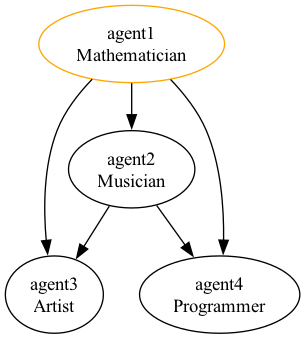

In [33]:
g.add_member(
        Agent(
            name="agent3", role="Artist",
            description="Transfer to me if you need help with art.", dify_access_token=os.environ.get("AGENT3_ACCESS_TOKEN")
            ),
            [("agent1","agent3"),("agent2","agent3")]
    )

g.add_member(
        Agent(
            name="agent4", role="Programmer",
            description="Transfer to me if you need help with programming.", model_client=model_client
            ),
            [("agent1","agent4"),("agent2","agent4")]
    )

Image(g.draw_relations())

 
[2024-12-10 18:23:04][INFO]: Self-defined relationships
 
[2024-12-10 18:23:04][INFO]: Successfully delete member agent2


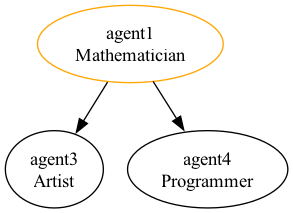

In [34]:
g.delete_member("agent2")
Image(g.draw_relations())

 
[2024-12-10 18:23:19][INFO]: handoff from agent1 to agent3 by using auto2 mode


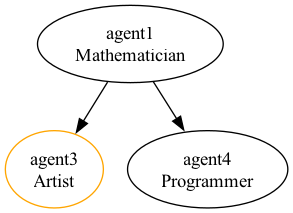

In [35]:

g.update_group_messages(Message(sender="user", action="talk", result="can you recommend me a art work?"))
next_agent = g.handoff(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini")
Image(g.draw_relations())

## Task

In [43]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# tools
def get_my_mood():
    """Get the mood of user."""
    return "I am so happy today!"

def get_current_time():
    """Get the current time."""
    return "It is 12:00 PM now."

def get_weather():
    """ Get the weather."""
    return "It is sunny today."

# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Agent(name = "agent1",
              role = "Personal Assistant", 
              description = "Transfer to me if you need help with personal stuff.",
              model_client = model_client,
              tools = [get_my_mood,get_current_time,get_weather],
              verbose = True),

        Agent(name="agent2", 
              role="Musician", 
              description="Transfer to me if you need help with music.", 
              dify_access_token=os.environ.get("AGENT2_ACCESS_TOKEN"),
              verbose=True)
    ]
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True)

 
[2024-12-10 18:27:32][INFO]: All agents are fully connected


In [44]:
task = "what kind of music is good for right now consider today's weather and my current mood?"
_ = g.task(task,model="gpt-4o-mini",strategy="sequential",entry_agent="agent1")

 
[2024-12-10 18:27:41][INFO]: Start task: what kind of music is good for right now consider today's weather and my current mood?
 
[2024-12-10 18:27:41][INFO]: ===> Step 1
 
[2024-12-10 18:27:41][INFO]: no handoff needed, stay with agent1 judge by order mode
 
[2024-12-10 18:27:41][INFO]: Calling OpenAI agent
 
[2024-12-10 18:27:45][INFO]: Call agent agent1
 
[2024-12-10 18:27:45][INFO]: Agent agent1 response: By using the tool 'get_weather' with the arguments {}, the result is 'It is sunny today.'.
 
[2024-12-10 18:27:45][INFO]: Agent agent1 response: By using the tool 'get_my_mood' with the arguments {}, the result is 'I am so happy today!'.
 
[2024-12-10 18:27:45][INFO]: Agent agent1 response: Given that it is sunny today and you are feeling so happy, I would recommend upbeat and cheerful music. Genres like pop, reggae, or even some light acoustic may enhance your mood further. Artists like Pharrell Williams, Bob Marley, or Jack Johnson could be great choices for a sunny day filled